# SVM SVC Rbf-Kernel (Kernel SVM)

First, load the scikit-learn package:

In [47]:
import sklearn

Filter warnings and import matplotlib

In [48]:
# add plot inline in the page
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 9, 6
plt.rcParams['font.size'] = 16

import warnings  # Hide all warnings here
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Loading digits dataset

scikit-learn gives simple access to [public datasets](http://scikit-learn.org/stable/datasets/index.html)

In [49]:
import numpy as np
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
print(X.shape)   # contains 1797 images of 64 pixels
print(y.shape)
print(np.unique(y))

(1797, 64)
(1797,)
[0 1 2 3 4 5 6 7 8 9]


Let's look at some images

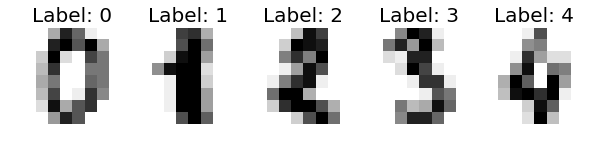

In [50]:
fig, axes = plt.subplots(1, 5, figsize=(10, 4))
for ax, (i, x) in zip(axes, enumerate(X[:5])):
    img = x.reshape(8, 8)
    ax.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Label: %i' % y[i], fontsize=20)
    ax.axis('off')

## Construction du modèle (SVC RBF-Kernel)

Objective: learn model that can predict digit from image

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, random_state=42)  # split data in train and test
classifier = SVC(kernel='rbf', C=1.)  # instantiate model
classifier.fit(X_train, y_train)  # learning
y_pred = classifier.predict(X_test)  # prediction

In [52]:
print(y_test[:4], y_pred[:4])

[6 9 3 7] [6 3 3 7]


Let's visualize the prediction:

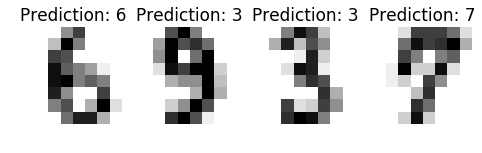

In [53]:
fig, axes = plt.subplots(1, 4, figsize=(8, 4))
for ax, (i, x) in zip(axes, enumerate(X_test[:5])):
    img = x.reshape(8, 8)
    ax.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % y_pred[i], fontsize=17)
    ax.axis('off')

## Matrice de confusion (SVC RBF-Kernel)

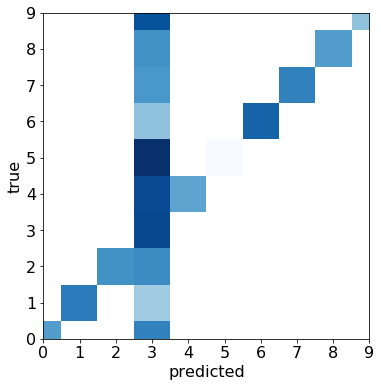

In [54]:
from sklearn.metrics import confusion_matrix
plt.imshow(np.log(confusion_matrix(y_test, y_pred)),
           cmap='Blues', interpolation='nearest')
plt.grid(False)
plt.xlim(0, 9)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.ylim(0, 9)
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

plt.ylabel('true')
plt.xlabel('predicted');

## Construction du modèle (Logistic Regression, qui est bien un algo de classification)

In [61]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [62]:
print(y_test[:4], y_pred[:4])

[6 9 3 7] [6 9 3 7]


Let's visualize the prediction:

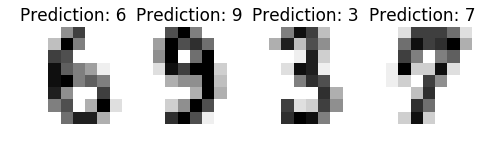

In [63]:
fig, axes = plt.subplots(1, 4, figsize=(8, 4))
for ax, (i, x) in zip(axes, enumerate(X_test[:5])):
    img = x.reshape(8, 8)
    ax.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % y_pred[i], fontsize=17)
    ax.axis('off')

## Matrice de confusion (Logistic Regression)

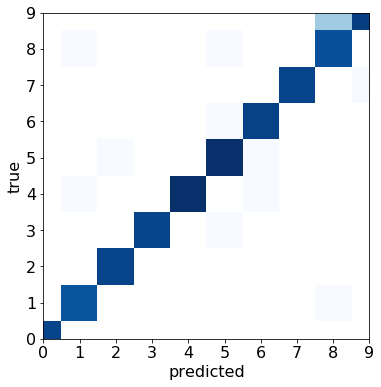

In [64]:
from sklearn.metrics import confusion_matrix
plt.imshow(np.log(confusion_matrix(y_test, y_pred)),
           cmap='Blues', interpolation='nearest')
plt.grid(False)
plt.xlim(0, 9)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.ylim(0, 9)
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

plt.ylabel('true')
plt.xlabel('predicted');